<a href="https://colab.research.google.com/github/ishammansoor/AI-and-Machine-Learning/blob/main/Emotional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()

'/device:GPU:0'

Load in the training, Testing and Validation datasets from Kaggle

In [143]:
df_train = pd.read_csv("./content/train.txt", sep=";", header=None, names=['text', 'labels'])
df_test = pd.read_csv("./content/test.txt", sep=";", header=None, names=['text', 'labels'])
df_val = pd.read_csv("./content/val.txt", sep=";", header=None, names=['text', 'labels'])

Visualize the percentage of emotions for each datasets

<Figure size 800x800 with 0 Axes>

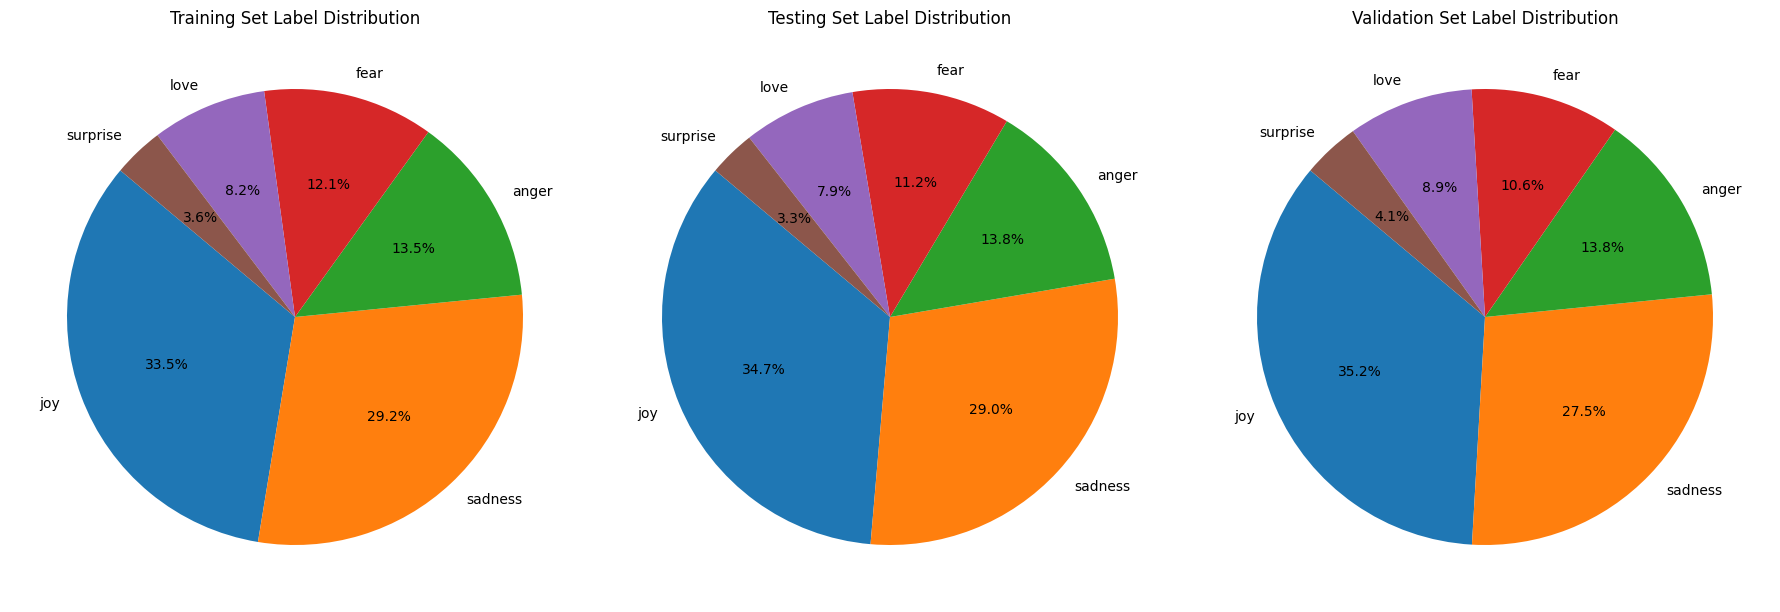

In [139]:
plt.figure(figsize=(8, 8))

# Get the label distribution
train_label_distribution = df_train['labels'].value_counts()
test_label_distribution = df_test['labels'].value_counts()
val_label_distribution = df_val['labels'].value_counts()

# Step 3: Create the pie chart
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Pie chart for training dataset
axs[0].pie(train_label_distribution, labels=train_label_distribution.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Training Set Label Distribution')

# Pie chart for testing dataset
axs[1].pie(test_label_distribution, labels=test_label_distribution.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Testing Set Label Distribution')

# Pie chart for validation dataset
axs[2].pie(val_label_distribution, labels=val_label_distribution.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Validation Set Label Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Creating tokenizing the words using tensorflow

In [140]:
#creating a tokenizer for the text analyser
tokenizer = Tokenizer(num_words = 393822, oov_token='')
tokenizer.fit_on_texts(df_train['text'])
tokenizer.fit_on_texts(df_test['text'])
tokenizer.fit_on_texts(df_val['text'])
X_train_sequences = tokenizer.texts_to_sequences(df_train['text'])
X_test_sequences = tokenizer.texts_to_sequences(df_test['text'])
X_val_sequences = tokenizer.texts_to_sequences(df_val['text'])

In [133]:
# Finding the maxlen for the the suences of training text
maxlen = max(len(tokens) for tokens in X_train_sequences)
maxlen2 = max(len(tokens) for tokens in X_test_sequences)
maxlen3 = max(len(tokens) for tokens in X_val_sequences)
maxlen = max(maxlen, maxlen2, maxlen3)

X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=maxlen, padding='post')

input_size = np.max(X_train_padded) + 1
input_size

15367

change the labels to match a number

In [144]:
# Step 2: Identify unique emotions
unique_emotions = df_train['labels'].unique()
print(unique_emotions)
# Step 3: Create a mapping dictionary
emotion_to_number = {emotion: idx for idx, emotion in enumerate(unique_emotions)}

# Step 4: Apply the mapping to the 'labels' column
df_test['label_numbers'] = df_test['labels'].map(emotion_to_number)
df_train['label_numbers'] = df_train['labels'].map(emotion_to_number)
df_val['label_numbers'] = df_val['labels'].map(emotion_to_number)

# Display the first few rows to verify
# print(df_test.head())

['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


In [145]:
model = keras.Sequential([
    layers.Input(shape=(maxlen,)),
   layers.Embedding(input_dim=input_size, output_dim=100,),
   layers.Bidirectional(layers.LSTM(128)),
   layers.BatchNormalization(),
   layers.Dropout(rate=0.5),
   layers.Dense(128, activation="relu"),
   layers.Dropout(rate=0.5),
   layers.Dense(105, activation="relu"),
   layers.Dropout(rate=0.5),
   layers.Dense(64, activation="relu"),
   layers.Dropout(rate=0.5),
   layers.Dense(6, activation="softmax"),
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [146]:
history = model.fit(
    X_train_padded,
    df_train['label_numbers'],
    epochs=50,
    batch_size=32,
    validation_data=(X_val_padded, df_val['label_numbers']),
    callbacks=[early_stopping]
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3423 - loss: 1.6052 - val_accuracy: 0.3555 - val_loss: 2.0824
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6224 - loss: 1.0355 - val_accuracy: 0.6450 - val_loss: 0.9875
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7115 - loss: 0.7272 - val_accuracy: 0.5110 - val_loss: 1.6644
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7640 - loss: 0.5708 - val_accuracy: 0.7990 - val_loss: 0.5414
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8191 - loss: 0.4640 - val_accuracy: 0.7520 - val_loss: 1.0117
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8838 - loss: 0.3310 - val_accuracy: 0.8245 - val_loss: 0.5533
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9185 - loss: 0.2442 - val_accuracy: 0.8675 - val_loss: 0.4401
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9261 - loss: 0.2306 - val_acc

visualizing the loss and validation loss for the model

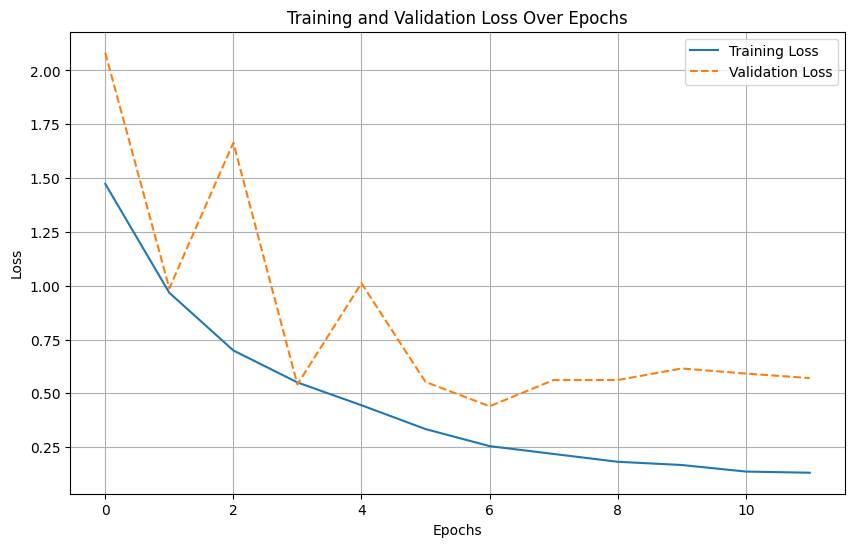

In [154]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']  # Optional: Validation loss
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

# Step 3: Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--',)  # Optional
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Test the results of model prediction using the test dataset

In [155]:
predictions = model.predict(X_test_padded)

# Get the index of the maximum value for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Display the indices of the highest values
print('predicted', predicted_classes[:20])
actual_val = df_test['label_numbers'].to_numpy()
print('actual   ', actual_val[:20])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
predicted [0 0 0 5 0 4 0 5 5 1 1 0 0 5 2 0 5 0 1 5]
actual    [0 0 0 5 0 4 1 5 5 1 4 0 4 5 2 0 5 0 1 5]
